<a href="https://colab.research.google.com/github/sujalsha/Stock-Market-Analysis/blob/main/stockMarketAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [7]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DAA/stocks.csv")

# New section

# New section

In [8]:
df.head()


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [9]:
df.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
for ticker, group in df.groupby('Ticker'):
    fig = px.line(group, x='Date', y='Close',
                  title=f"{ticker} ")
    fig.show()

In [11]:
moving_averages = ['MA10','MA20','MA30']

for i in moving_averages:
    ma = int(i[2:])
    df[i] = df.groupby('Ticker')['Close'].rolling(window=ma).mean().reset_index(0, drop=True)

for ticker, group in df.groupby('Ticker'):
    print(f'Moving Averages for {ticker}')
    print(group[moving_averages])


Moving Averages for AAPL
          MA10      MA20        MA30
0          NaN       NaN         NaN
1          NaN       NaN         NaN
2          NaN       NaN         NaN
3          NaN       NaN         NaN
4          NaN       NaN         NaN
..         ...       ...         ...
57  166.631000  165.2730  163.437000
58  166.837999  165.3915  163.808333
59  166.819998  165.4825  164.080666
60  166.733998  165.5840  164.345999
61  167.588998  166.0295  164.834000

[62 rows x 3 columns]
Moving Averages for GOOG
           MA10        MA20        MA30
186         NaN         NaN         NaN
187         NaN         NaN         NaN
188         NaN         NaN         NaN
189         NaN         NaN         NaN
190         NaN         NaN         NaN
..          ...         ...         ...
243  106.209000  106.416500  105.476000
244  106.295000  106.470000  105.611000
245  106.405001  106.520000  105.620334
246  106.336001  106.533001  105.653334
247  106.366500  106.398750  105.651834

[6

In [12]:
for ticker, group in df.groupby('Ticker'):
    fig = px.line(group, x='Date', y=['Close', 'MA10', 'MA20','MA30'],
                  title=f"{ticker} Moving Averages")

    fig.show()


In [13]:
df['daily_returns']=(df.groupby('Ticker')['Close'].pct_change())*100

In [14]:
for ticker, group in df.groupby('Ticker'):
    print(ticker)
    fig = px.line(group, x='Date',y='daily_returns',
                  title=f"{ticker} Moving Averages")


    fig.show()

AAPL


GOOG


MSFT


NFLX


In [15]:
for ticker, group in df.groupby('Ticker'):
    fig = px.histogram(group, x='daily_returns',
                  title=f"{ticker} Moving Averages",nbins=50)


    fig.show()


In [16]:
for ticker,group in df.groupby('Ticker'):
    daily_returns = group['daily_returns'].std()
    print(ticker,f'{round(daily_returns,2)}%')


AAPL 1.42%
GOOG 2.07%
MSFT 1.79%
NFLX 2.25%


In [17]:
df=df.set_index('Date')


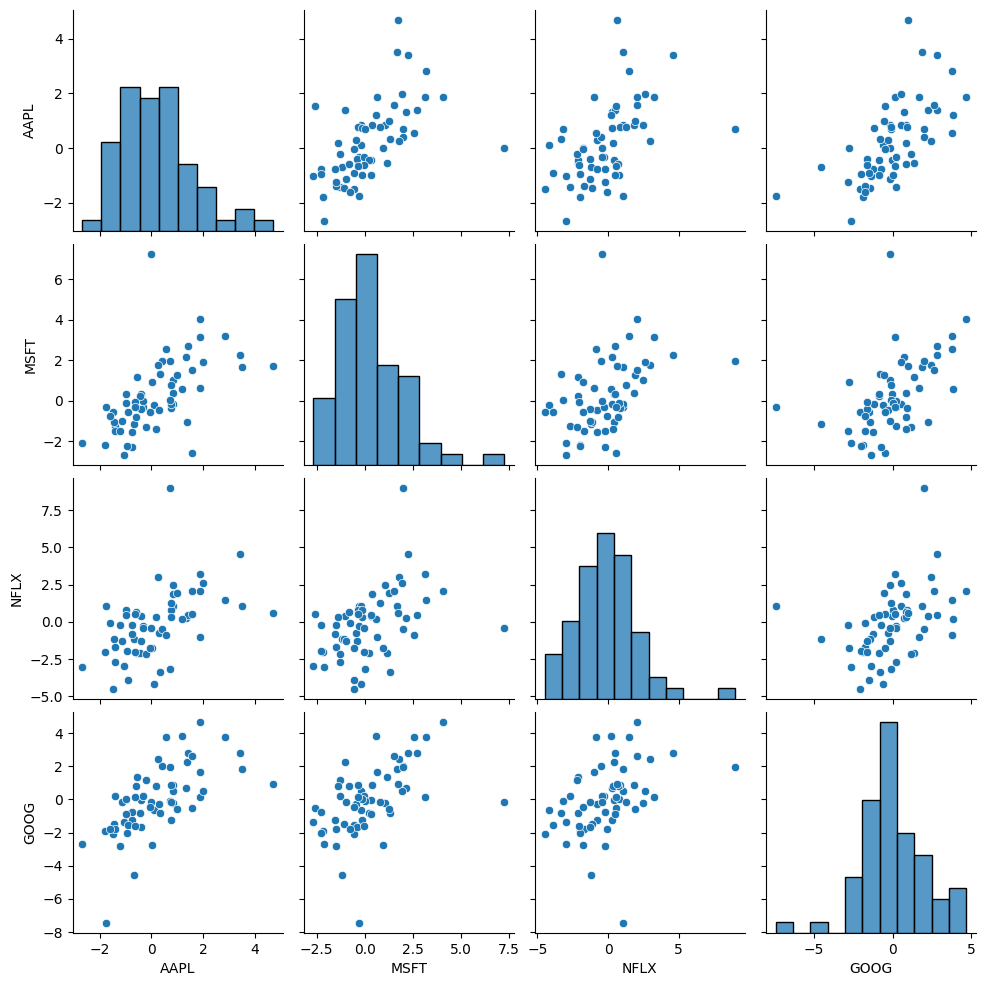

In [18]:
ticker_list = df['Ticker'].unique()

for i in ticker_list:
    globals()[i] =df.loc[df['Ticker']==i,['daily_returns']].rename(columns={'daily_returns':i})


df_corr = pd.concat([AAPL, MSFT, NFLX, GOOG],axis=1)
sns.pairplot(df_corr)